# Topic of Interest : Trends of COVID-19 Clusters in Malaysia

In [1]:
import pandas as pd
import get_data,get_visual

In [2]:
#ELT
#Extraction = done extraction from MOH COVID19 Repo by using Github Desktop
#Loading = by using user def 'get_data' function called read_csv 
#The function can call any dataset in MOH covid19 repo by specifying folder name and filename

# Load clusters dataset

In [3]:
df = get_data.read_csv('epidemic','clusters')

In [4]:
df

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,14,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,"1,5,10,14,16",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),0,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,"5,10,14,16",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,6,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,KLUSTER DUA JALAN PADANG GOLF 3,10,HULU SELANGOR,2022-11-26,2022-11-25,highRisk,active,0,25,25,35,0,0,0,Kluster ini merupakan kluster berulang untuk k...,This is a third recurring cluster involving re...
7152,KLUSTER JALAN PADANG GOLF 5,10,HULU SELANGOR,2022-11-27,2022-11-26,highRisk,active,0,3,3,13,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the fifth repeated cluster inv...
7153,KLUSTER DAH BATU 19,2,KUBANG PASU,2022-11-27,2022-12-04,education,active,12,84,84,214,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves students from an educati...
7154,KLUSTER DAH TERABAK,2,KUBANG PASU,2022-12-01,2022-12-04,education,active,2,89,89,702,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves the students of an educa...


# Transform dataset

In [5]:
## Transform dataset
df = get_data.convert_state_code(df) #------------convert state from numbers to known category
df = df.drop(['summary_en','summary_bm'],axis=1) #-------------drop column that are not specific to analysis
datecolumn = ['date_announced','date_last_onset']
for column in datecolumn:
    df[column] = pd.to_datetime(df[column],yearfirst=True) #----------------parse date columns
df[['category','status']] = df[['category','status']].astype('category') #transform categorical columns in dataset

In [6]:
## Overview and Transform
df = get_data.null_values(df,'district','not_stated') #---------------read null values from a column and return null statement

Number of NaN values present: cluster             0
state               0
district           13
date_announced      0
date_last_onset     0
category            0
status              0
cases_new           0
cases_total         0
cases_active        0
tests               0
icu                 0
deaths              0
recovered           0
dtype: int64

null values in district replaced with 'not_stated'

Number of NaN values present:  + cluster            0
state              0
district           0
date_announced     0
date_last_onset    0
category           0
status             0
cases_new          0
cases_total        0
cases_active       0
tests              0
icu                0
deaths             0
recovered          0
dtype: int64



## Overview of dataset

In [7]:
df.head() #--------------------top 5 of dataset

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
0,KLUSTER WARGA JEPUN,W.P. KUALA LUMPUR,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3
1,KLUSTER UDA,"JOHOR,NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMP...",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),not stated,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988
3,KLUSTER TABLIGH NEW DELHI,"NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMPUR,W.P...",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24
4,KLUSTER AIROD,PAHANG,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65


In [8]:
df.tail() #----------------bottom 5 of dataset

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
7151,KLUSTER DUA JALAN PADANG GOLF 3,SELANGOR,HULU SELANGOR,2022-11-26,2022-11-25,highRisk,active,0,25,25,35,0,0,0
7152,KLUSTER JALAN PADANG GOLF 5,SELANGOR,HULU SELANGOR,2022-11-27,2022-11-26,highRisk,active,0,3,3,13,0,0,0
7153,KLUSTER DAH BATU 19,KEDAH,KUBANG PASU,2022-11-27,2022-12-04,education,active,12,84,84,214,0,0,0
7154,KLUSTER DAH TERABAK,KEDAH,KUBANG PASU,2022-12-01,2022-12-04,education,active,2,89,89,702,0,0,0
7155,KLUSTER JALAN KAKI BUKIT,PERLIS,KANGAR,2022-12-02,2022-12-03,education,active,0,12,12,12,0,0,0


In [9]:
df.info() #-------------detect datatype for each column and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cluster          7156 non-null   object        
 1   state            7156 non-null   object        
 2   district         7156 non-null   object        
 3   date_announced   7156 non-null   datetime64[ns]
 4   date_last_onset  7156 non-null   datetime64[ns]
 5   category         7156 non-null   category      
 6   status           7156 non-null   category      
 7   cases_new        7156 non-null   int64         
 8   cases_total      7156 non-null   int64         
 9   cases_active     7156 non-null   int64         
 10  tests            7156 non-null   int64         
 11  icu              7156 non-null   int64         
 12  deaths           7156 non-null   int64         
 13  recovered        7156 non-null   int64         
dtypes: category(2), datetime64[ns](2), int64

In [10]:
print(f'''
Features available in the dataset
------------------------------------
{df.columns}

Number of columns in dataset : {df.shape[1]}
Number of rows in dataset : {df.shape[0]}

Clusters category
-----------------
{df.category.cat.categories}

Clusters status
----------------
{df.status.cat.categories}

''') #---------------features available in the dataset


Features available in the dataset
------------------------------------
Index(['cluster', 'state', 'district', 'date_announced', 'date_last_onset',
       'category', 'status', 'cases_new', 'cases_total', 'cases_active',
       'tests', 'icu', 'deaths', 'recovered'],
      dtype='object')

Number of columns in dataset : 14
Number of rows in dataset : 7156

Clusters category
-----------------
Index(['community', 'detentionCentre', 'education', 'highRisk', 'import',
       'religious', 'workplace'],
      dtype='object')

Clusters status
----------------
Index(['active', 'ended'], dtype='object')




In [11]:
df.loc[df['status'] == 'active'] #------List out all active clusters

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
7088,KLUSTER JALAN REJANG,W.P. KUALA LUMPUR,TITIWANGSA,2022-10-27,2022-11-07,education,active,0,44,44,59,0,0,0
7092,KLUSTER MAYANG PASIR 2,PULAU PINANG,"BARAT DAYA, TIMUR LAUT, SEBERANG PERAI UTARA",2022-10-31,2022-11-22,workplace,active,0,110,110,1385,0,0,0
7098,KLUSTER CHANGKAT BERANGAN,PERAK,"HULU PERAK, KUALA KANGSAR",2022-11-03,2022-11-10,education,active,0,144,144,154,0,0,0
7100,KLUSTER KM132 AYER PA’ABAS 2,MELAKA,"ALOR GAJAH, MELAKA TENGAH",2022-11-04,2022-11-16,education,active,0,204,197,300,0,0,7
7101,KLUSTER JALAN SEREMBAN TIGA 2,NEGERI SEMBILAN,SEREMBAN,2022-11-04,2022-11-16,education,active,0,84,84,276,0,0,0
7102,KLUSTER JALAN KAMPUNG PILIN,NEGERI SEMBILAN,REMBAU,2022-11-04,2022-11-17,education,active,0,108,108,166,0,0,0
7105,KLUSTER JALAN SHAH BANTING 3,SELANGOR,KUALA LANGAT,2022-11-06,2022-11-23,education,active,0,125,125,125,0,0,0
7106,KLUSTER INDUSTRI RAWANG BESTARI 3,SELANGOR,"GOMBAK, HULU SELANGOR",2022-11-08,2022-11-07,workplace,active,0,10,10,10,0,0,0
7107,KLUSTER JALAN BUKIT IDAMAN,SELANGOR,"GOMBAK, HULU SELANGOR",2022-11-08,2022-11-07,workplace,active,0,6,6,6,0,0,0
7108,KLUSTER JALAN SAYUR,W.P. KUALA LUMPUR,CHERAS,2022-11-08,2022-11-07,education,active,0,7,7,7,0,0,0


In [12]:
get_data.show_cluster_max(df,'deaths') # ---------------list out cluster with max death (row in dataframe)

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
2382,KLUSTER RANTAU KENANGA,"PAHANG,PERAK","MARAN, BERA, TEMERLOH, JERANTUT, KUANTAN, BENT...",2021-06-08,2021-07-27,community,ended,0,568,0,4772,0,37,531


In [13]:
get_data.show_cluster_max(df,'cases_total') # ---------------list out cluster with max total cases (row in dataframe)

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
272,KLUSTER TERATAI,"NEGERI SEMBILAN,SELANGOR,TERENGGANU,W.P. KUALA...","KLANG, KUALA SELANGOR, PETALING, HULU LANGAT, ...",2020-11-07,2021-03-19,workplace,ended,0,7205,0,10426,0,1,7204


## Descriptive Analysis

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cases_new,7156.0,0.001956,0.143809,0.0,0.0,0.0,0.00,12.0
cases_total,7156.0,78.429290,199.387438,2.0,18.0,35.0,73.00,7205.0
cases_active,7156.0,0.355226,5.303520,0.0,0.0,0.0,0.00,197.0
tests,7156.0,318.667552,1086.949175,3.0,51.0,117.0,282.25,42100.0
icu,7156.0,0.001677,0.040919,0.0,0.0,0.0,0.00,1.0
deaths,7156.0,0.272359,1.288240,0.0,0.0,0.0,0.00,37.0
recovered,7156.0,77.770542,199.073056,0.0,18.0,35.0,73.00,7204.0


In [15]:
# Total number of cases and clusters (with descriptive statistics) in clusters
df.groupby(['category']).agg({'cases_total':['size','sum','mean','std','var']})

cases_total                                               
                       size     sum        mean         std            var
category                                                                  
community              1732  110855   64.004042  127.018940   16133.811076
detentionCentre         162   42013  259.339506  535.614075  286882.436815
education               975   49374   50.640000   62.495870    3905.733717
highRisk                486   18346   37.748971   45.623863    2081.536855
import                   53    2441   46.056604  159.485521   25435.631350
religious               181   16076   88.817680  172.900919   29894.727686
workplace              3567  322135   90.309784  231.444422   53566.520664

In [16]:
# Total number of clusters and respective cases by status of cluster, sort by descending number of cases
df.groupby(['status','category']).agg({'cluster':'count','cases_total':'sum'}).sort_values(ascending=False,by='cluster')

cluster  cases_total
status category                             
ended  workplace           3561       321976
       community           1732       110855
       education            938        47408
       highRisk             474        17997
       religious            181        16076
       detentionCentre      160        41936
       import                53         2441
active education             37         1966
       highRisk              12          349
       workplace              6          159
       detentionCentre        2           77
       community              0            0
       import                 0            0
       religious              0            0

## Visualization of Data

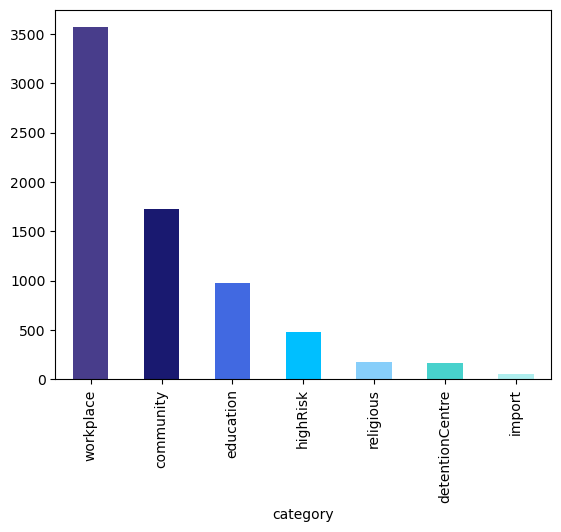

In [17]:
get_visual.plot_clustercategory_bar(df)